### OCI Data Science - Useful Tips
<details>
<summary><font size="2">Check for Public Internet Access</font></summary>

```python
import requests
response = requests.get("https://oracle.com")
assert response.status_code==200, "Internet connection failed"
```
</details>
<details>
<summary><font size="2">Helpful Documentation </font></summary>
<ul><li><a href="https://docs.cloud.oracle.com/en-us/iaas/data-science/using/data-science.htm">Data Science Service Documentation</a></li>
<li><a href="https://docs.cloud.oracle.com/iaas/tools/ads-sdk/latest/index.html">ADS documentation</a></li>
</ul>
</details>
<details>
<summary><font size="2">Typical Cell Imports and Settings for ADS</font></summary>

```python
%load_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import logging
logging.basicConfig(format='%(levelname)s:%(message)s', level=logging.ERROR)

import ads
from ads.dataset.factory import DatasetFactory
from ads.automl.provider import OracleAutoMLProvider
from ads.automl.driver import AutoML
from ads.evaluations.evaluator import ADSEvaluator
from ads.common.data import ADSData
from ads.explanations.explainer import ADSExplainer
from ads.explanations.mlx_global_explainer import MLXGlobalExplainer
from ads.explanations.mlx_local_explainer import MLXLocalExplainer
from ads.catalog.model import ModelCatalog
from ads.common.model_artifact import ModelArtifact
```
</details>
<details>
<summary><font size="2">Useful Environment Variables</font></summary>

```python
import os
print(os.environ["NB_SESSION_COMPARTMENT_OCID"])
print(os.environ["PROJECT_OCID"])
print(os.environ["USER_OCID"])
print(os.environ["TENANCY_OCID"])
print(os.environ["NB_REGION"])
```
</details>

In [1]:
%cd StackGAN-Pytorch-Python3/code

/home/datascience/StackGAN/StackGAN-Pytorch-Python3/code


<h3>入力テキスト表現</h3>
<ol>
    <li>a family is sitting around a dinner table</li>
    <li>a baseball player is holding a bat and is standing</li>
    <li>there are animals that are grassing in the field </li>
    <li>a small laptop is sitting on a desk</li>
</ol>

In [2]:
!python main.py --cfg cfg/coco_eval.yml --gpu 0

/home/datascience/StackGAN/StackGAN-Pytorch-Python3/code/miscc/config.py:94: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  yaml_cfg = edict(yaml.load(f))
Using config:
{'CONFIG_NAME': 'stageII',
 'CUDA': True,
 'DATASET_NAME': 'coco',
 'DATA_DIR': '../data/coco',
 'EMBEDDING_TYPE': 'cnn-rnn',
 'GAN': {'CONDITION_DIM': 128, 'DF_DIM': 96, 'GF_DIM': 192, 'R_NUM': 2},
 'GPU_ID': '0',
 'IMSIZE': 256,
 'NET_D': '',
 'NET_G': '../models/coco/netG_epoch_90.pth',
 'STAGE': 2,
 'STAGE1_G': '',
 'TEXT': {'DIMENSION': 1024},
 'TRAIN': {'BATCH_SIZE': 40,
           'COEFF': {'KL': 2.0},
           'DISCRIMINATOR_LR': 0.0002,
           'FLAG': False,
           'GENERATOR_LR': 0.0002,
           'LR_DECAY_EPOCH': 600,
           'MAX_EPOCH': 600,
           'PRETRAINED_EPOCH': 600,
           'PRETRAINED_MODEL': '',
           'SNAPSHOT_INTERVAL': 50},
 'VIS_COUNT': 64,
 'WORKERS': 

In [3]:
%cd ../models/coco/netG_epoch_90/

/home/datascience/StackGAN/StackGAN-Pytorch-Python3/models/coco/netG_epoch_90


In [4]:
%matplotlib inline
from matplotlib import pyplot as plt
from PIL import Image
import glob
import math

In [5]:
img_list = sorted(glob.glob('*'), reverse=False)
img_11 = img_list[:10]
img_249 = img_list[10:20]
img_3 = img_list[20:30]
img_44 = img_list[30:]

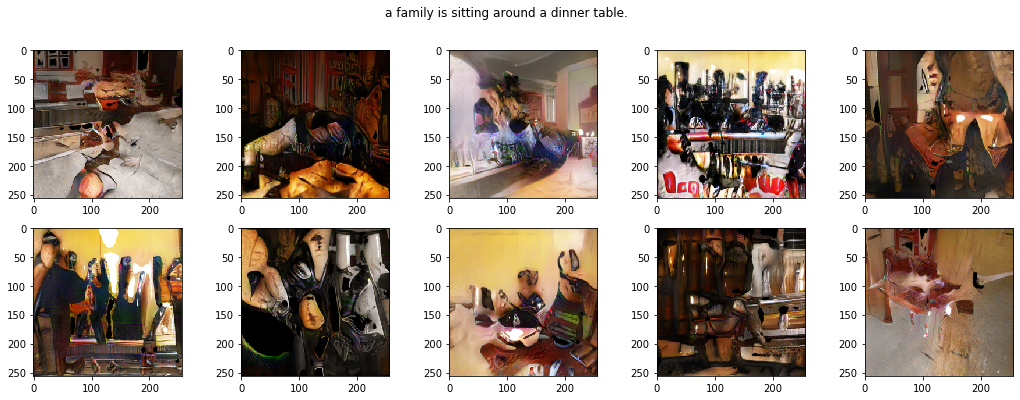

In [6]:
plt.figure(figsize=(18,6))
plt.suptitle('a family is sitting around a dinner table.')
for i in range(len(img_11)):
    plt.subplot(2, 5, i+1)
    img = Image.open("{}".format(img_11[i]))
    plt.imshow(img)
plt.show()

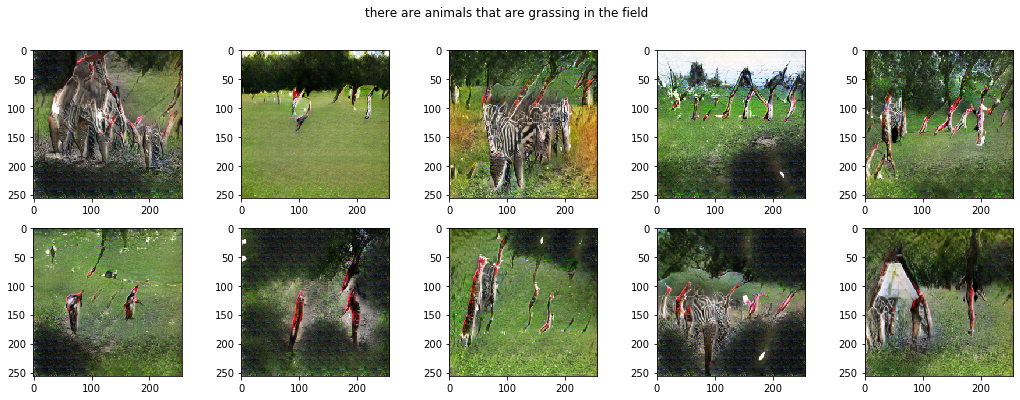

In [7]:
plt.figure(figsize=(18,6))
plt.suptitle('there are animals that are grassing in the field')
for i in range(len(img_249)):
    plt.subplot(2, 5, i+1)
    img = Image.open("{}".format(img_249[i]))
    plt.imshow(img)
plt.show()

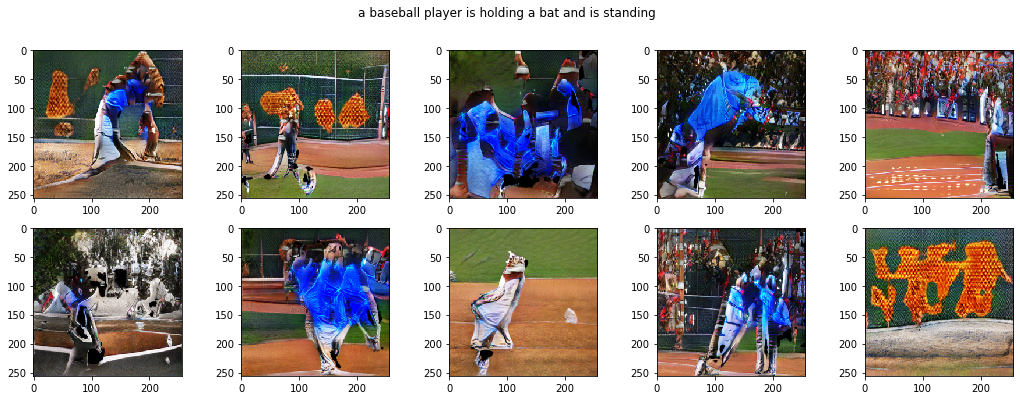

In [8]:
plt.figure(figsize=(18,6))
plt.suptitle('a baseball player is holding a bat and is standing')
for i in range(len(img_3)):
    plt.subplot(2, 5, i+1)
    img = Image.open("{}".format(img_3[i]))
    plt.imshow(img)
plt.show()

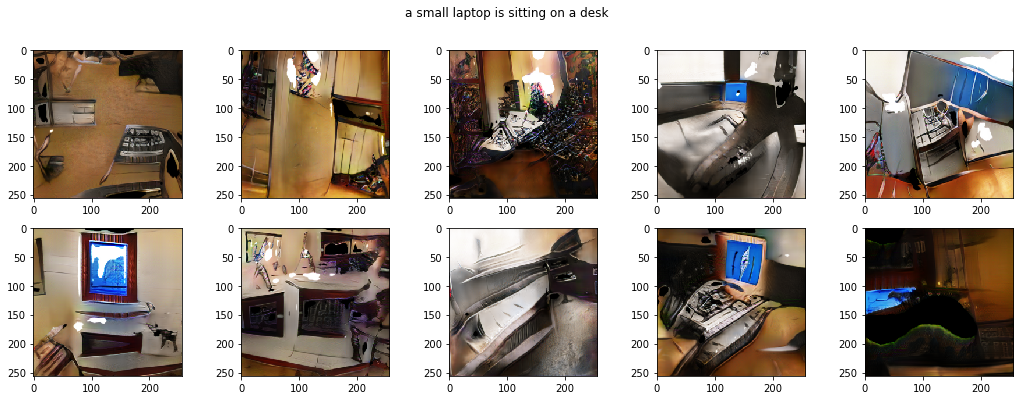

In [9]:
plt.figure(figsize=(18,6))
plt.suptitle('a small laptop is sitting on a desk')
for i in range(len(img_44)):
    plt.subplot(2, 5, i+1)
    img = Image.open("{}".format(img_44[i]))
    plt.imshow(img)
plt.show()